# ELE510 Image Processing and Computer Vision: LAB, Exercise 8, Stereo Vision and Camera Calibration.

**Purpose:** *To learn about imaging with two cameras, stereo, and reconstrution by triangulation.*

Read the text carefully before starting the work. In many cases it is necessary to do some preparations before you start the work on the computer. Read the necessary theory and answer the theoretical part first. The theoretical and experimental part should be solved individually. The notebook must be approved by the lecturer or the teaching assistants. 

The theory for this exercise can be found in chapter 13 of the text book [1] and in chapter 4 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)
- [scipy](https://docs.scipy.org/doc/)

<div class="alert alert-block alert-info">
Please, make sure that you have previously installed all the packages contained in the `requirements.txt` file.
</div>

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single PDF file. Read the `ELE510_Getting_started.pdf` file for more information.
</div>

## Note regarding the notebook

- You will find placeholders marked with `...` throughout the code. Your task is to replace each `...` with the appropriate code. Ensure that each placeholder is properly filled in to complete the implementation.

- The theoretical questions have to be answered directly on the notebook using the *Markdown* cells marked as **Answer here**. LaTex commands (if relevant) are available using the command `$...$`. You can also attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`

## Problem 1 (Correspondence problem) 

![stereocamera.png](./images/stereocamera.png)

Assume that we have a simple stereo system as shown in the figure. **L** and **R** denotes the focal point of the Left and Right camera respectively.  ${\mathbf P}$ is a point in the 3D world, and ${\mathbf p}$ in the 2D image plane. $^{\small L}{\mathbf P_w}$ denotes a world point with reference to the focal point of the Left camera. The baseline (line between the two optical centers) is $B = 20\,\text{cm}$ and the focal length $f = 5\,\text{cm}$. 

**a)** An image of resolution $600\times600$ pixels is seen by two cameras (Left and Right). The image sensor size of both cameras is $8\text{mm} \times 8\text{mm}$. Let the depth of the object regarding the cameras be $Z=10m$. Estimate the disparity $d$ in pixels of the image coordinates.

In [11]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt 

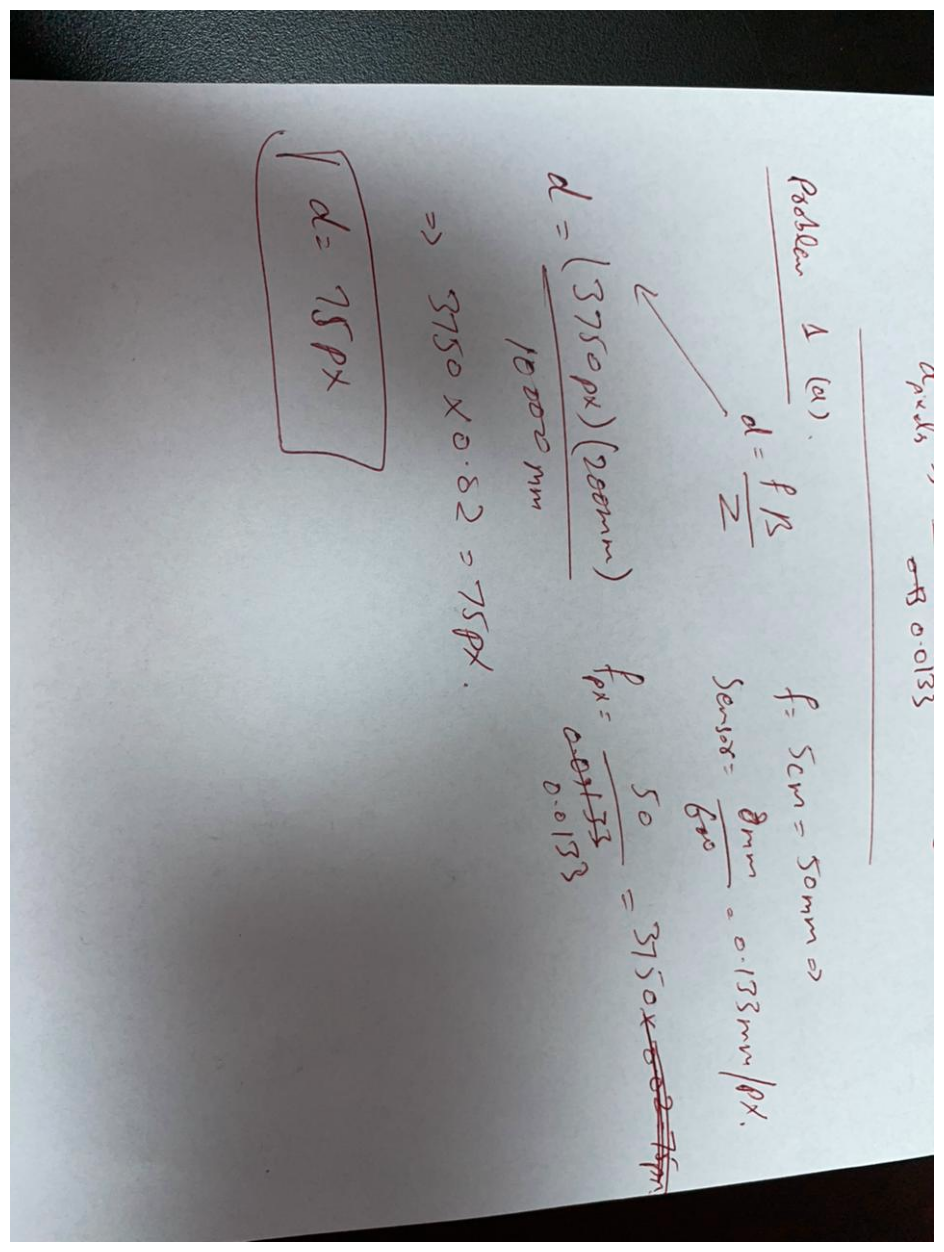

In [12]:
img1 = cv2.imread("./images/l8p1.jpg")
plt.figure(figsize=(16, 16))
plt.imshow(img1, cmap="gray")
plt.axis("off")
plt.show()

**b)** Consider the scene point $^{\small L}{\mathbf P_w} = [0.5, 0, 20]^{T}$ meters. Suppose that due to various errors, the image coordinate $x_{l}$ is 5% **bigger** than its true value, while the image coordinate $x_{r}$ is perfect. What is the error in depth $z_w$, in millimeters (round up to three decimals)?

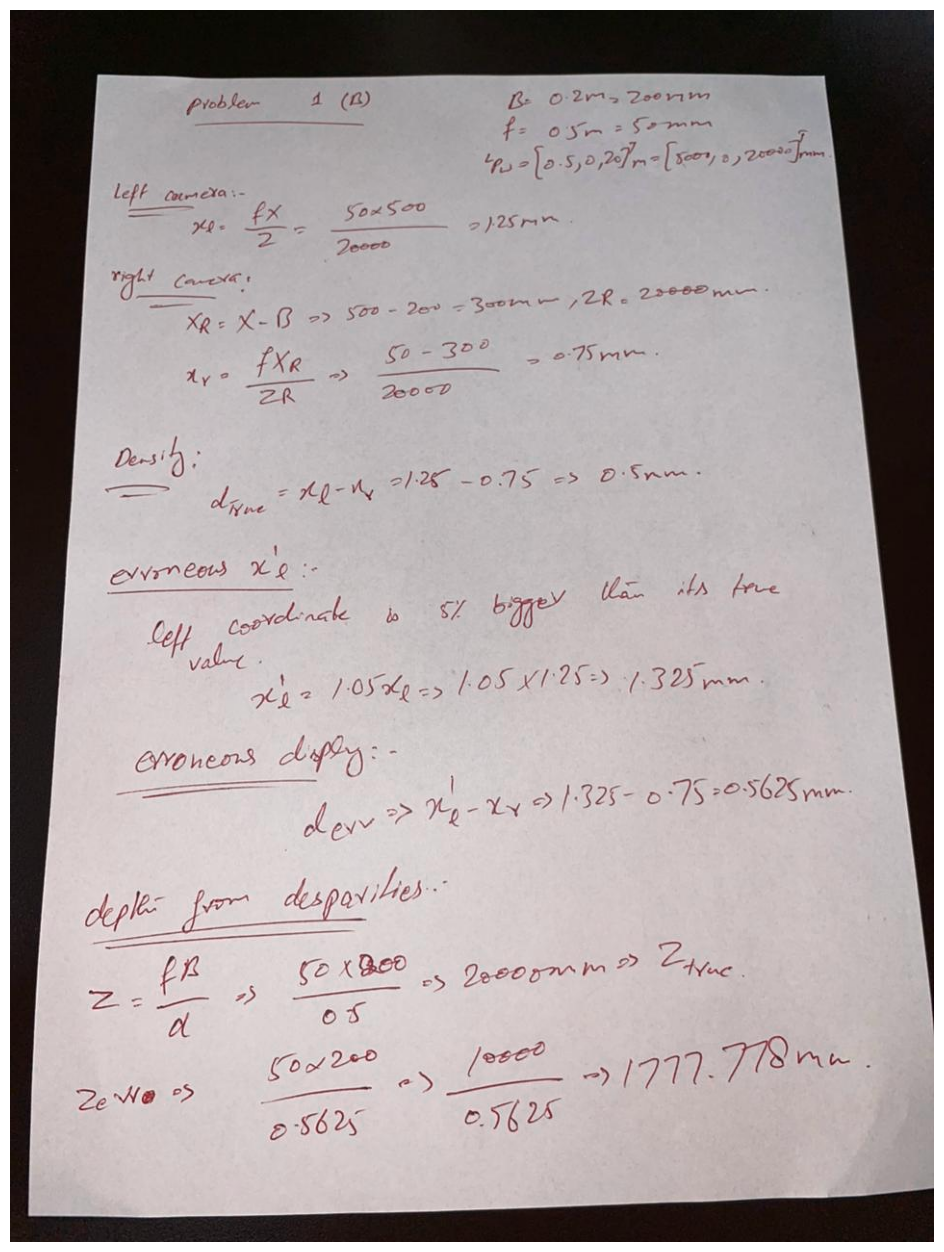

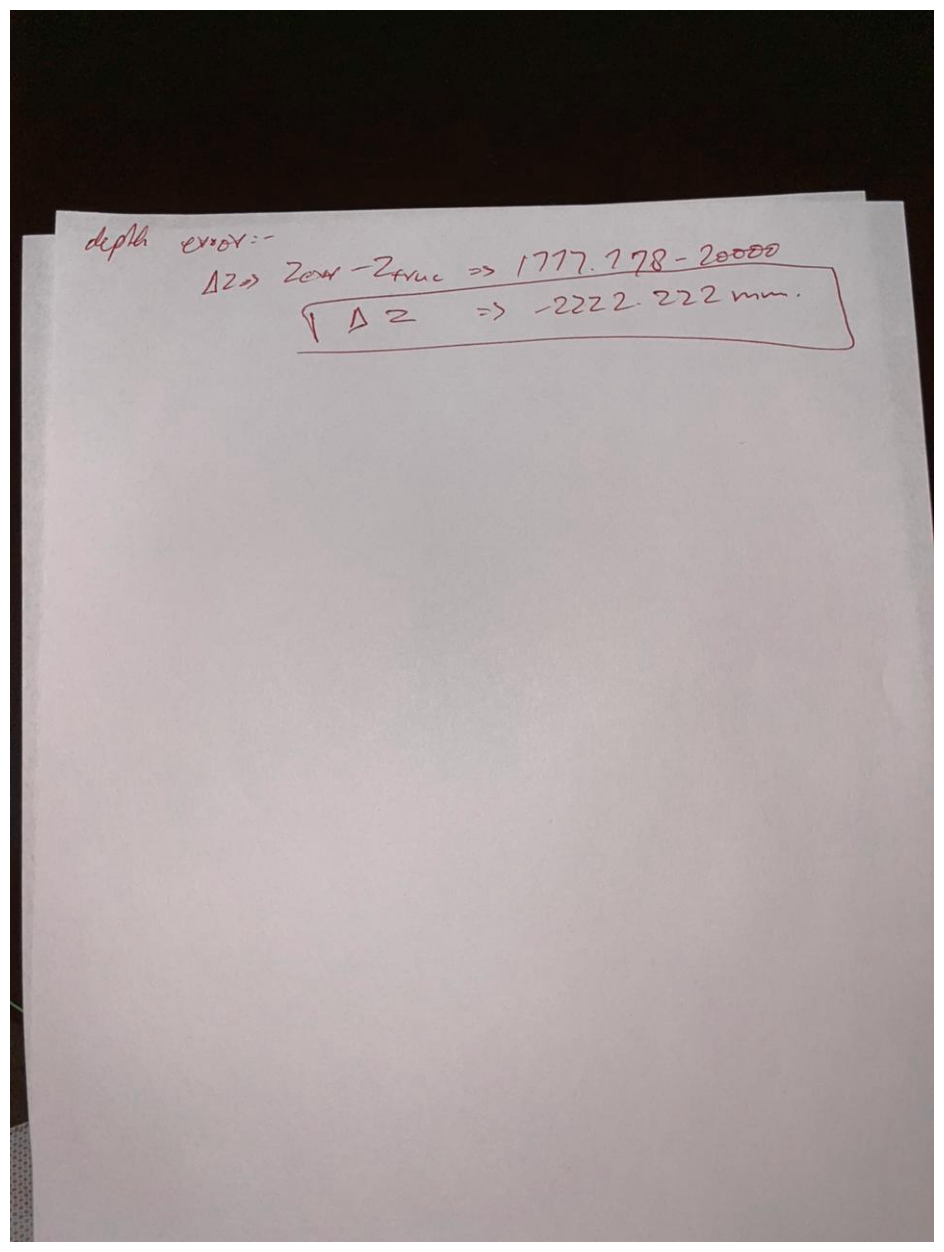

In [13]:
img1 = cv2.imread("./images/l8p2.jpg")
img2 = cv2.imread("./images/l8p3.jpg")
plt.figure(figsize=(16, 16))
plt.imshow(img1, cmap="gray")
plt.axis("off")
plt.show()
plt.figure(figsize=(16, 16))
plt.imshow(img2, cmap="gray")
plt.axis("off")
plt.show()

**c)** Can you explain with your own words the stereo ordering constraint? What is the definition of forbidden zone in this scenario?

Two different cameras left and right should see the objects A,B,C in the same order as log as the viewing conditions are normal.

## Problem 2 (Block Matching)

The simplest algorithm to compute dense correspondence between a pair of stereo images is **block matching**.
Block matching is an *area-based* approach that relies upon a statistical correlation between local intensity regions.

For each pixel (x,y) in the left image, the right image is searched for the best match among all possible disparities $0 \le d \le d_{\text{max}}$.

**a)** Use the function `cv2.StereoBM_create(numDisparities=64, blockSize=21)` ([Documentation](https://docs.opencv.org/master/d9/dba/classcv_1_1StereoBM.html)) 
([Class Documentation](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#stereobm)) to compute stereo correspondence using the block matching algorithm and find the disparity map between the following images: **./images/aloeL.jpg** and **./image/aloeR.jpg**. Comment the result.

**Note**: By default, OpenCV internally corrected numDisparities to a default value of 64 when a lower value is used. At the same time, this argument has to be multiple of 16.

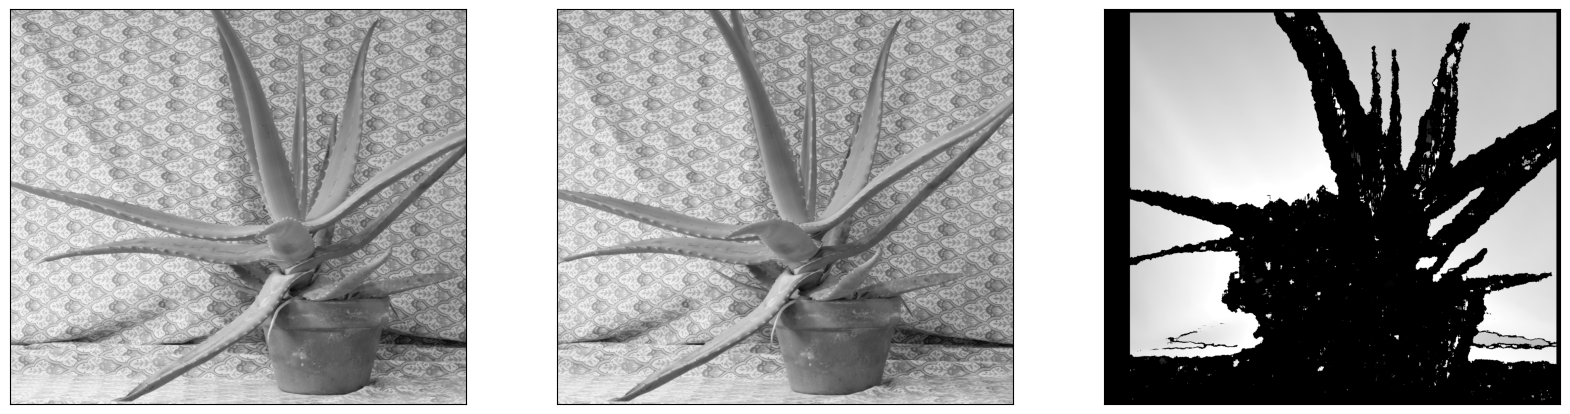

In [14]:
# Read images in grayscale
left = cv2.imread('./images/images/aloeL.jpg', cv2.IMREAD_GRAYSCALE)
right = cv2.imread('./images/images/aloeR.jpg', cv2.IMREAD_GRAYSCALE)

# Compute Stereo Block Matching
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=21)
disparity = stereo.compute(left,right)

# Normalize the disparity map between 0 and 255 for display
disparity_norm = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)
disparity_norm = np.uint8(disparity_norm)

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(left, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(right, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity_norm,'gray'), plt.xticks([]), plt.yticks([])
plt.show()

you can clearly see the aloe plant standing out from the background. The closer parts of the plant show up brighter which means they’re nearer to the camera.

**b)** What happens if you increase the `numDisparities` parameter in the `cv2.StereoBM_create()`? And if you change the `blockSize` parameter? Explain the effect of both parameters and show examples.

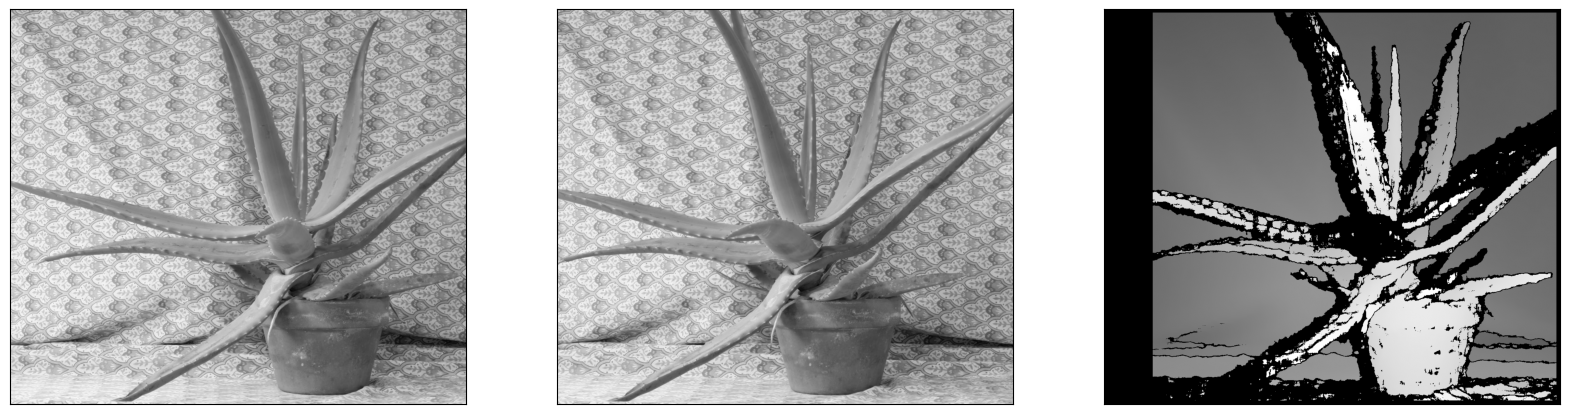

In [15]:
# Increase numDisparities. It has to be multiple of 16.
stereo = cv2.StereoBM_create(numDisparities=128, blockSize=21)
disparity = stereo.compute(left, right)

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(left, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(right, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity,'gray'), plt.xticks([]), plt.yticks([])
plt.show()

After bumping numDisparities up to 128, the depth map got more detailed, it covers a wider range of distances now. you can tell the shape of the plant better, but it also got a bit noisier in flat areas.

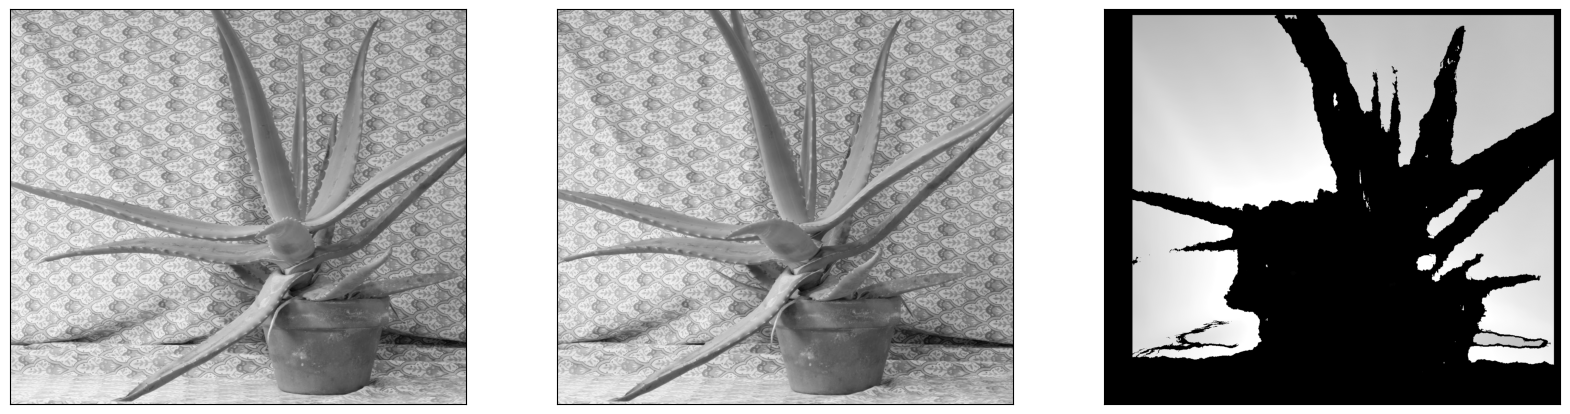

In [16]:
# Increase blockSize
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=35)
disparity = stereo.compute(left, right)

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(left, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(right, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(disparity,'gray'), plt.xticks([]), plt.yticks([])
plt.show()

I made the blockSize bigger (from 21 to 35), the result looked smoother.But it also blurred out the details, especially around the thin leaves. the small blocks keep more detail, big ones make it cleaner but lose sharp edges.

## Problem 3 (Camera calibration)

The goal of camera calibration is to estimate the intrinsic and extrinsic parameters from one or several images, giving us a projection matrix transforming from 3D object points in meters to 2D image points in "pixels". Additionally, some pinhole cameras introduce significant distortion to images. Two major kinds of distortion are radial distortion and tangential distortion. Radial distortion causes straight lines to appear curved, while tangential distortion occurs because the image-taking lens is not aligned perfectly parallel to the imaging plane. Given the radial distance $r$ between the pixel and the undistorted point, these distortions are represented as: 

- Radial distortion
\begin{equation}
    x_{distorted} = x( 1 + k_1 r^2 + k_2 r^4 + k_3 r^6) \qquad y_{distorted} = y( 1 + k_1 r^2 + k_2 r^4 + k_3 r^6)
\end{equation}

- Tangential distortion
\begin{equation}
    x_{distorted} = x + [ 2p_1xy + p_2(r^2+2x^2)] \qquad y_{distorted} = y + [ p_1(r^2+ 2y^2)+ 2p_2xy]
\end{equation}

Therefore, for a better calibration, these distortions need to be corrected first.

**a)** The most popular technique for calibrating the intrinsic camera parameters is Zhang’s algorithm. OpenCV's function for calibrating is actually based on this algorithm. Explain briefly how it works.

- the process is started with capturing multiple images. 

- from different orientations and positions. 

- Then detecting the features like corners or edges. 

- Then the coordinates are used to caclulate the homography. 

- The intrinsic paratmeters are calculated by using relationship between multiple homographies.

- Once the intrinsic matrix is known calculating the extrinsic parameters for each view is easy. 

- then we estimate the distortion coefficients

- last step is refining all parameters, global optimization.

the calibration returns:

- intrinsic matrix, deistortion coefficients, rotation and translation vectors for each view

**b)** Find the pattern in the chessboard images by using the `cv2.findChessboardCorners` function. Since this function may not be able to find the required pattern in all the chessboard images, we will loop over all the images availables (usually around 10 pattern images are required for camera calibration). Then, implement calibration with `cv2.calibrateCamera`. 

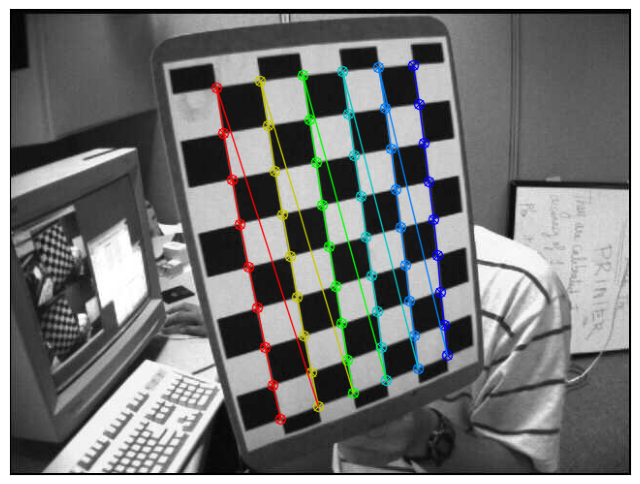

In [17]:
# Find pattern

# Find all chessboard images in grayscale
from glob import glob
images = glob('./images/images/left*.jpg')  # Define a pattern to read all the images

# Define the grid (rows x cols) of possible internal corners based on the chessboard images
rows = 6 # Integer value
cols = 9 # Integer value

# Prepare object points (3D)
objp = np.zeros((rows*cols, 3), np.float32)
objp[:,:2] = np.mgrid[0:cols, 0:rows].T.reshape(-1,2)
 
# Lists to store object points (3D) and image points (2D) from all the images
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

for img_path in images:

    # Read image in grayscale
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (cols, rows), None)
    
    # If found, add object points and image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

# Draw and display the corners of last image

cv2.drawChessboardCorners(img, (cols, rows), corners, ret)
plt.figure(figsize=(8,8)), plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
# Camera calibration
ret, camera_matrix, dist_coefs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],cameraMatrix=None, distCoeffs=None)

print("camera matrix:\n", camera_matrix)
print("distortion coefficients: ", dist_coefs.ravel())

camera matrix:
 [[532.35423658   0.         342.42264659]
 [  0.         532.53995406 235.04228201]
 [  0.           0.           1.        ]]
distortion coefficients:  [-2.73462172e-01 -3.85288349e-02  1.12629584e-03 -1.75411180e-04
  2.85170396e-01]


**c)** Now, we can take an image and undistort it with `cv2.undistort`. However first, we can refine the camera matrix based on a free scaling parameter using `cv2.getOptimalNewCameraMatrix`. If the scaling parameter `alpha=0`, it returns undistorted image with minimum unwanted pixels. So it may even remove some pixels at image corners. If `alpha=1`, all pixels are retained with some extra black pixels. This function also returns an image ROI which can be used to crop the result.

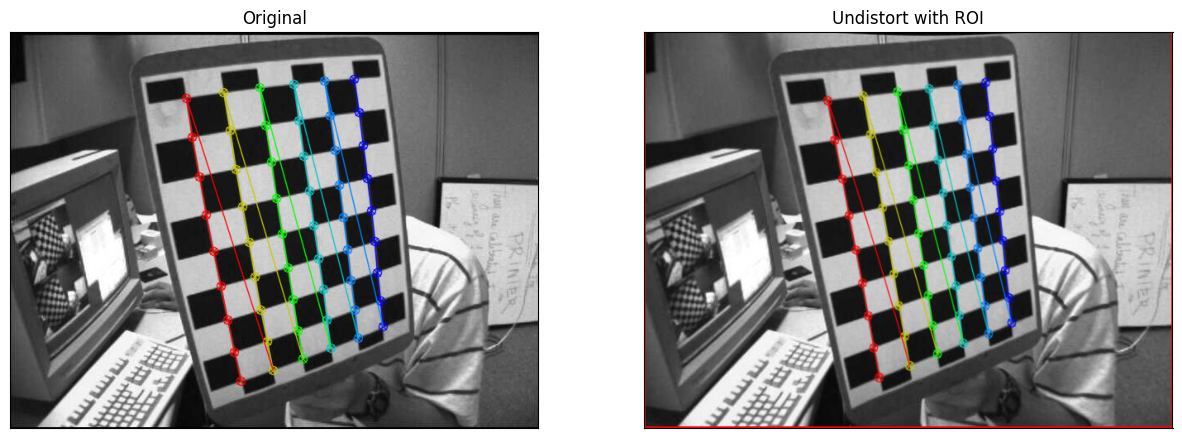

In [19]:
# Get image shape. We are still using the last image from 3a.
h, w = img.shape[:2]

# Returns the new camera intrinsic matrix based on the camera matrix and the distortion coefficients
new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coefs, (w, h), alpha=0)


# Transforms an image to compensate for lens distortion using the camera matrix, 
# the distortion coefficients and the camera matrix of the distorted image.
dst = cv2.undistort(img, camera_matrix, dist_coefs, None, new_camera_matrix)

# roi = output rectangle that outlines all-good-pixels region in the undistorted image. 
x, y, w, h = roi

plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img, "gray"), plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.rectangle(dst,(x,y),(w,h),(255,0,0),2), "gray"), plt.title('Undistort with ROI'), plt.xticks([]), plt.yticks([])
plt.show()

**d)** Finally, we can estimate the re-projection error to know how exact the found parameters are. The closer the re-projection error is to zero, the more accurate the parameters we found are. Given the intrinsic, distortion, rotation and translation matrices, we must first transform the object point to image point using `cv2.projectPoints`. Then, we can calculate the L2-norm between what we got with our transformation and the corner finding algorithm.

In [20]:
mean_error = 0
for i in range(len(objpoints)):
 imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], camera_matrix, dist_coefs) # Convert to image points
 imgpoints_error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2) # L2-Norm and average
 mean_error += imgpoints_error
 
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.0454431585321517


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Md Sazidur Rahman, room E-401
E-mail: md.s.rahman@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.